# Лекция 7. Использование библиотек Numpy и Matplotlib

Мы все ближе подходим к задачам реального анализа данных. В этой лекции мы поговорим про использование наших первых сторонних бибилиотек.  Эта тема довольно обширна. В этой лекции мы обсудим библиотеки Numpy и MatplotLib, а в следующей – библиотеку Pandas.

_Что такое библиотека?_

Библиотека или пакет – внешний модуль, в который другие программисты собрали часто используемые функции и объекты и выложили их в открытый доступ, чтобы любой, кто столкнулся с похоже проблемой, мог воспользоваться уже готовым решением, а не строить велосипеды. Когда мы пишем программы, то часто используем сторонние библиотеки. Это удобно и просто. Давайте же попробуем!

## Установка

Чтобы установить библиотеки, вам необходимо открыть консоль / терминал / штуку с черным фоном, где в фильмах хакеры пишут цветные буквы. И написать там вот такую магию:

`pip3 install numpy`

Таким образом мы говорим менеджеру пакетов Python (`pip3` – штука, которая отвечает за установку внешних зависимостей), что нам нужно установить пакет под назанием `numpy`. Дальше начнется установка, в консоли вы увидите логи. В конце вы должны увидеть сообщение об успешной установке.

Когда установите `numpy`, нужно будет установить `matplotlib`:

`pip3 install matplotlib`.

_Если у вас на компьютере не установлен Python, пожалуйста, посмотрите, как его установить в лекции 1._

## Numpy и эффективные списки

Python – удобный высокоуровневый язык, однако за удобство написания кода мы платим скоростью его выполнения. Она не сравнима с низкоуровневыми языками, такими как С, С++, Go или Rust.

Бывают ситуации, когда вам необходимо обработать большой объем данных, и если скорость обработки можно увеличить в несколько раз, это очень приятно. Для того, чтобы работу можно было ускорить, нам необходимо использовать _более совершенные и быстрые_ структуры даннх. Именно такие возможности нам и дает библиотека Numpy.

Основной объект, с которым мы будем работать в Numpy – массивы. Они очень похожи на списки, но работают гораздо быстрее.

Для примера давайте посмотрим, с какой сторостью Python пробежиться по списку из 10000 чисел и возведет каждое из них в квадрат.

In [1]:
numbers = [1.5] * 10000
numbers[:5]

[1.5, 1.5, 1.5, 1.5, 1.5]

In [3]:
%%timeit

squares = [x**2 for x in numbers]

932 µs ± 37.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


А теперь то же самое, но с помощью эффективных массивов Numpy

In [4]:
import numpy as np

np_numbers = np.array(numbers)

In [5]:
%%timeit

np_squares = np_numbers**2

5.4 µs ± 154 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


_Ого! Вот это разница! Больше, чем в 170 раз!_

С тем, что Numpy – штука классная все понятно. Давайте теперь разберемся, как с ним работать.

Для начала – импортируем его. После этого мы сможем обращаться к функциям и объектам этой библиотеки через сокращение `np`.

In [6]:
import numpy as np

Итак, как я уже говорил, основной объект, с которым мы работаем в Numpy – массивы. Чтобы создать массив существует несколько способов, самый простой из них – создать его из обычного списка.

In [7]:
array = np.array([1, 2, 3])
print(array)
type(array)

[1 2 3]


numpy.ndarray

`np.array` (или `np.ndarray`) – очень похож на список. Это тоже упорядоченная последовательность элементов, у которых есть индексы. Разница лишь в том, что в массиве numpy все элементы должны быть одного типа. В примере выше это, например, числа.

Важно, что если мы при создании массива "скормим" numpy список, в котором лежат разные типы, он самостоятельно ковертирует их и приведет к одному типу.

In [8]:
array = np.array([1, 2, 3, 'abc'])
array

array(['1', '2', '3', 'abc'], dtype='<U21')

Как видите, все числа в списке были преобразованы в строки.

При создании массива numpy выбирает самый "вместительный" тип и приводит все элементы к нему. В случае с `int` и `str` это строка. А в случае с `int` и `float` – вещественное число.

In [9]:
array = np.array([1, 2, 3, 4.5])
array

array([1. , 2. , 3. , 4.5])

У массивов, как и у списков, есть длина

In [10]:
len(array)

4

У элементов массивов, так же как и у элементов списков, есть индексы, по индексам можно получать элемент.

In [11]:
array[0]

1.0

Так же как и у списков, значения элементов можно менять

In [12]:
array[0] = 100.0
array

array([100. ,   2. ,   3. ,   4.5])

И срезы делать тоже можно

In [14]:
array[1:3]

array([2., 3.])

И итерироваться по ним

In [15]:
for i in array:
    print(i)

100.0
2.0
3.0
4.5


### Отличия от списков

#### Математические операции

Но все-таки отличия от обычных питоновских списков есть. И главное из них в том, что все операции над массивами выполняются _поэлементно_. Давайте разберемся.

Сначала посмотрим на списки. Допустим у нас есть два списка и мы складываем их (конкатенируем). В итоге получаем список, в котором есть элементы первых двух.

In [16]:
list_a = [1, 2, 3]
list_b = [4, 5, 6]

list_a + list_b

[1, 2, 3, 4, 5, 6]

А вот с массивом numpy все будет иначе. Поскольку операции выполняются поэлементно, то оператор `+` будем означать не конкатенацию, а _поэлементное сложение_ каждого элемента из первого массива с элементом с аналогичным индексом во втором массиве.

In [17]:
array_a = np.array([1, 2, 3])
array_b = np.array([4, 5, 6])

array_a + array_b

array([5, 7, 9])

А если вы хотите именно конкатенировать массивы, нужно использовать специальную функцию `concatenate`.

In [19]:
np.concatenate([array_a, array_b])

array([1, 2, 3, 4, 5, 6])

Поэлементно для массивов выполняются _все_ математические операции.

In [20]:
array_a * array_b

array([ 4, 10, 18])

In [22]:
array_a ** array_b

array([  1,  32, 729])

In [23]:
array_a / array_b

array([0.25, 0.4 , 0.5 ])

А результатом всегда является новый массив.

Конечно же, это работает только в том случае, _если длины массивов совпадают_. В противном случае мы получим ошибку.

In [24]:
array_c = np.array([1, 2])

array_a + array_c

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

К массивам можно применять разные математические операции. Но важно отметить, что для специальных математических операций нужно пользоваться функциями из пакета `numpy`, а не `math`. Все, что в `math` – это для обычных чисел :)

In [25]:
np.sqrt(array_a)

array([1.        , 1.41421356, 1.73205081])

#### Срезы

Выше уже упомяналось, что у массивов, как и у списков, есть срезы. Но есть и нюанс :)

In [32]:
# создадим список
list_a = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# и сделаем на основе него слайс
slice_a = list_a[1: 3]

print(slice_a)

[2, 3]


In [33]:
# а теперь поменяем значение элемента в слайсе
slice_a[0] = 1

print('В слайсе значение поменялось', slice_a)
print('А в списке нет', list_a)

В слайсе значение поменялось [1, 3]
А в списке нет [1, 2, 3, 4, 5, 6, 7, 8, 9]


Так и должно быть – когда мы создаем слайс на основе списка, то получаем _новый объект_ – копию диапазона списка.

С массивами же все не так. Давайте посмотрим.

In [35]:
# создадим массив
array_a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# и на основе массива сделаем слайс
array_slice_a = array_a[1: 3]

# все хорошо, у нас есть слайс
print(array_slice_a)

[2 3]


In [36]:
# поменяем значение в слайсе
array_slice_a[0] = 1

print('В слайсе значение поменялось', array_slice_a)
print('И в списке тоже! ', array_a)

В слайсе значение поменялось [1 3]
И в списке тоже!  [1 1 3 4 5 6 7 8 9]


О как! Оказывается, numpy при создании среза не копирует данные. Срез просто ссылается на создавшией его массив. То есть срез `array_slice_a` знает, что его элемент с индексом 0 на самом деле элемент массива `array_a` с индексом 1, а элемент среза `array_slice_a` с индексом 1 на самом деле элемент массива `array_a` с индексом 2.

_Зачем это вообще нужно?_

Сделано так для того, чтобы не тратить ресурсы на создание копии объекта, а ссылаться на уже существующий объект. Именно благодаря таким маленьким улучшениям работа с numpy сильно быстрее и эффективнее, чем с обычными списками.

Впрочем, копию массива создать тоже можно. Для этого нужно использовать специальную функцию.

In [37]:
array_a = np.array([1, 2, 3])
array_b = array_a.copy()

array_b[0] = 100

print(array_a)
print(array_b)

[1 2 3]
[100   2   3]


### Продвинутые возможности Numpy

Помимо быстрой работы есть в numpy и другие продвинутые возможности. Например, удобное индексирование. Вот таким образом мы например можем получить _копию_ массива только с элементами с нужными нам индексами.

_Обратите внимание на двойные скобки_.

In [38]:
array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
array[[0, 3, 5]]

array([1, 4, 6])

Можно получить массив состоящий из несколько элементов с одинаковыми индексами.

In [40]:
array[[1, 1, 1]]

array([2, 2, 2])

А еще можно задавать _сложные_ условия выбора элементов из массива. Например, мы хотим выбрать из массива все элементы, значение которых меньше нуля.

In [41]:
array = np.array([1, 2, -1, -100, 0, -200, 5, 10])
y = array[ array < 0 ]

y

array([  -1, -100, -200])

...или даже еще более сложные

In [44]:
y = array[ (array < 0) | (array > 5) ]
y

array([  -1, -100, -200,   10])

Вот такое двойное условие – выбрать в новый массив все элементы, значение которых меньше 0 или больше 5. В данном случае оператор `|` означает логическое ИЛИ. И здесь очень важны скобочки, иначе не заработает:

In [45]:
y = array[ array < 0 | array > 5 ]
y

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

А еще с помощью таких условных операторов можно заменить какие-то элементы в массиве. Например, вот так мы заменяем в массиве `x` все элементы, которые больше 50, на 0.

In [47]:
x = np.array([1, 2, 3, 51, 67, 90, 100, 1000])
x[ x>50 ] = 0

x

array([1, 2, 3, 0, 0, 0, 0, 0])

И еще немного про сравнение массивов. Поскольку это все-таки не питоновские списки, то и тут есть особенность. При сравнении нужно использовать специальную функцию из пакета `numpy`.

In [53]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.array([1, 2, 3])

np.array_equal(a, b)

False

In [54]:
np.array_equal(a, c)

True

## Визуализация данных в matplotlib

Вторая интересная штука – это рисовалка для графиков – библиотека matplotlib. Внутри этой библиотеки огромное количество модулей и функций, с помощью которых можно делать различные двухмерные и даже псевдотрехмерные изображения. Вообще, matplotlib это целый мир, про него люди пишут целые книги.

Можете, например, посмотреть книгу Шабанова П.А "Научная графика в Python" (https://nbviewer.jupyter.org/github/whitehorn/Scientific_graphics_in_python/blob/master/P1%20Chapter%201%20Pyplot.ipynb). Там детально разбирается в частности, что же такое matplotlib, и как с ним работать.

Ну а мы познакомимся с одним модулем этой библиотеки, и оценим его возможности. Этот модуль называется pyplot. Давайте его импортируем, и посмотрим, что он умеет.

In [55]:
import matplotlib.pyplot as plt

И еще добавим такую магию, чтобы можно было рисовать графики прямо в тетрадке.

In [56]:
%matplotlib inline

В `pyplot` есть несколько функций для рисования. Основная из них – `plot()`. С помощью нее мы можем нарисовать график, передав аргументами координаты для точек.

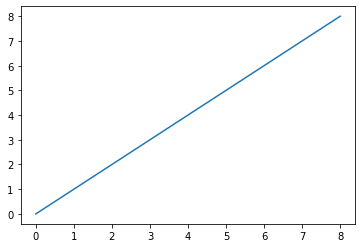

In [57]:
plt.plot([0, 2, 4, 8], [0, 2, 4, 8])

Можем передать дополнительный параметр, и тогда точки не будут соединены линией, а будут отдельными точками.

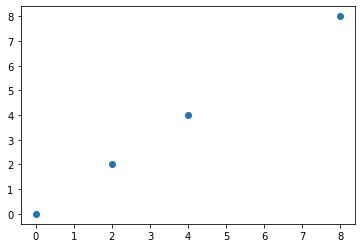

In [58]:
plt.plot([0, 2, 4, 8], [0, 2, 4, 8], 'o')

Или треугольниками...

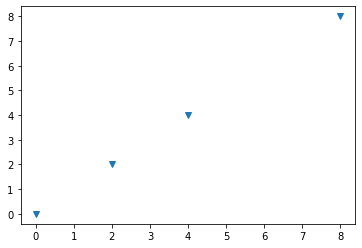

In [59]:
plt.plot([0, 2, 4, 8], [0, 2, 4, 8], 'v')

...или квадратами, соединенными линией.

Вообще-то есть целое море параметров, подробнее о них можно почитать в документации – https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html

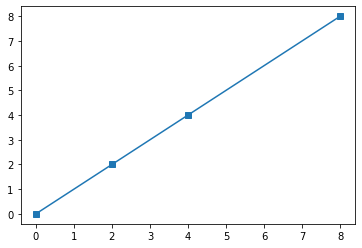

In [64]:
plt.plot([0, 2, 4, 8], [0, 2, 4, 8], '-s')

Можно "скормить" функции `plot` массив `numpy`. Вот так мы создаем массив из 100 элементов, разбросанных от -10 до 10.

In [66]:
array = np.linspace(-10, 10, 100)
print(array)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

И рисуем, например, параболу

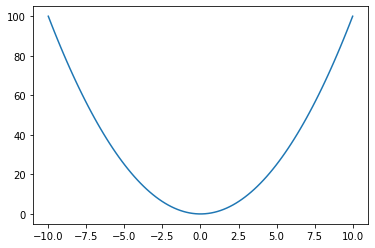

In [67]:
plt.plot(array, array**2)

Или не параболу...

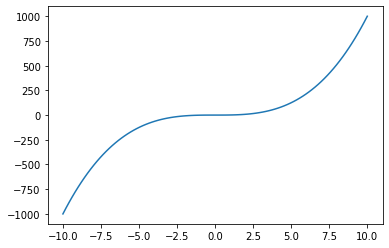

In [68]:
plt.plot(array, array**3)

...или косинус

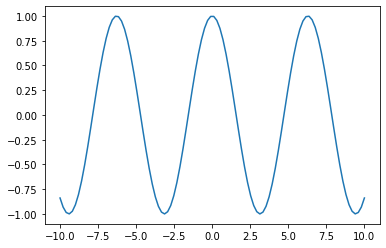

In [73]:
plt.plot(array, np.cos(array))

...а может быть и тангенс

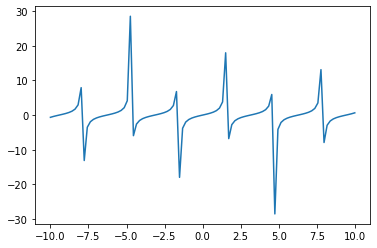

In [74]:
plt.plot(array, np.tan(array))

На одном холсте можно размещать несколько графиков, а также делать подписи и легенду.

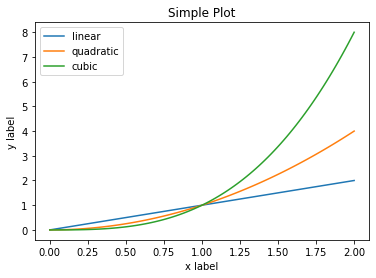

In [86]:
# генерируем точки
x = np.linspace(0, 2, 100)

# добавляем графики
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')

# подписываем оси
plt.xlabel('x label')
plt.ylabel('y label')

# добавляем название
plt.title("Simple Plot")

# добавляем легенду
plt.legend()

Можно нарисовать и другие графики. Например, гистограмму.

(array([ 8.,  8., 10., 12., 13.,  5., 10.,  9., 15., 10.]),
 array([0.00424096, 0.10319143, 0.20214191, 0.30109238, 0.40004285,
        0.49899333, 0.5979438 , 0.69689427, 0.79584475, 0.89479522,
        0.9937457 ]),
 <BarContainer object of 10 artists>)

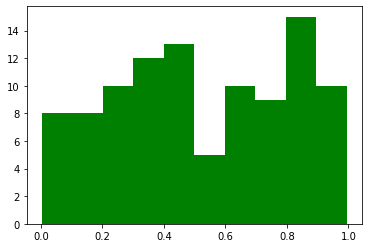

In [97]:
x = np.random.random(100)

plt.hist(x, color='green')

Или ящик с усами.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb923583a30>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb923590130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9235836d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9235907f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb923590b50>],
 'means': []}

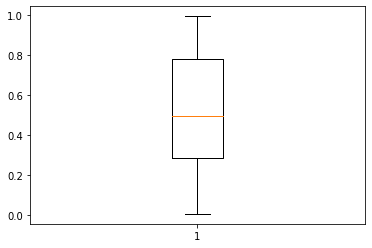

In [104]:
plt.boxplot(x)

Вообще с помощью `matplotlib` удобно и просто рисовать разные графики, чтобы визуализировать какие-то данные или просто проверить гипотезу. У этой библиотеки _очень_ широкие возможности – посмотрите хотя бы на этот пример из официальной документации – да в нем можно картины рисовать!

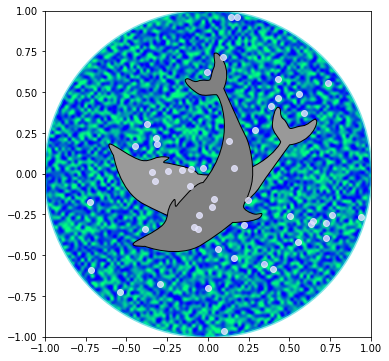

In [105]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
from matplotlib.path import Path
from matplotlib.transforms import Affine2D
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


r = np.random.rand(50)
t = np.random.rand(50) * np.pi * 2.0
x = r * np.cos(t)
y = r * np.sin(t)

fig, ax = plt.subplots(figsize=(6, 6))
circle = Circle((0, 0), 1, facecolor='none',
                edgecolor=(0, 0.8, 0.8), linewidth=3, alpha=0.5)
ax.add_patch(circle)

im = plt.imshow(np.random.random((100, 100)),
                origin='lower', cmap=cm.winter,
                interpolation='spline36',
                extent=([-1, 1, -1, 1]))
im.set_clip_path(circle)

plt.plot(x, y, 'o', color=(0.9, 0.9, 1.0), alpha=0.8)

# Dolphin from OpenClipart library by Andy Fitzsimon
#   <cc:License rdf:about="http://web.resource.org/cc/PublicDomain">
#     <cc:permits rdf:resource="http://web.resource.org/cc/Reproduction"/>
#     <cc:permits rdf:resource="http://web.resource.org/cc/Distribution"/>
#     <cc:permits rdf:resource="http://web.resource.org/cc/DerivativeWorks"/>
#   </cc:License>

dolphin = """
M -0.59739425,160.18173 C -0.62740401,160.18885 -0.57867129,160.11183
-0.57867129,160.11183 C -0.57867129,160.11183 -0.5438361,159.89315
-0.39514638,159.81496 C -0.24645668,159.73678 -0.18316813,159.71981
-0.18316813,159.71981 C -0.18316813,159.71981 -0.10322971,159.58124
-0.057804323,159.58725 C -0.029723983,159.58913 -0.061841603,159.60356
-0.071265813,159.62815 C -0.080250183,159.65325 -0.082918513,159.70554
-0.061841203,159.71248 C -0.040763903,159.7194 -0.0066711426,159.71091
0.077336307,159.73612 C 0.16879567,159.76377 0.28380306,159.86448
0.31516668,159.91533 C 0.3465303,159.96618 0.5011127,160.1771
0.5011127,160.1771 C 0.63668998,160.19238 0.67763022,160.31259
0.66556395,160.32668 C 0.65339985,160.34212 0.66350443,160.33642
0.64907098,160.33088 C 0.63463742,160.32533 0.61309688,160.297
0.5789627,160.29339 C 0.54348657,160.28968 0.52329693,160.27674
0.50728856,160.27737 C 0.49060916,160.27795 0.48965803,160.31565
0.46114204,160.33673 C 0.43329696,160.35786 0.4570711,160.39871
0.43309565,160.40685 C 0.4105108,160.41442 0.39416631,160.33027
0.3954995,160.2935 C 0.39683269,160.25672 0.43807996,160.21522
0.44567915,160.19734 C 0.45327833,160.17946 0.27946869,159.9424
-0.061852613,159.99845 C -0.083965233,160.0427 -0.26176109,160.06683
-0.26176109,160.06683 C -0.30127962,160.07028 -0.21167141,160.09731
-0.24649368,160.1011 C -0.32642366,160.11569 -0.34521187,160.06895
-0.40622293,160.0819 C -0.467234,160.09485 -0.56738444,160.17461
-0.59739425,160.18173
"""

vertices = []
codes = []
parts = dolphin.split()
i = 0
code_map = {
    'M': Path.MOVETO,
    'C': Path.CURVE4,
    'L': Path.LINETO,
}

while i < len(parts):
    path_code = code_map[parts[i]]
    npoints = Path.NUM_VERTICES_FOR_CODE[path_code]
    codes.extend([path_code] * npoints)
    vertices.extend([[*map(float, y.split(','))]
                     for y in parts[i + 1:][:npoints]])
    i += npoints + 1
vertices = np.array(vertices)
vertices[:, 1] -= 160

dolphin_path = Path(vertices, codes)
dolphin_patch = PathPatch(dolphin_path, facecolor=(0.6, 0.6, 0.6),
                          edgecolor=(0.0, 0.0, 0.0))
ax.add_patch(dolphin_patch)

vertices = Affine2D().rotate_deg(60).transform(vertices)
dolphin_path2 = Path(vertices, codes)
dolphin_patch2 = PathPatch(dolphin_path2, facecolor=(0.5, 0.5, 0.5),
                           edgecolor=(0.0, 0.0, 0.0))
ax.add_patch(dolphin_patch2)

plt.show()

Поздравляю вас со знакомством с этой замечательной либой. На этом сегодня закончим :)